<a href="https://colab.research.google.com/github/TitasDas/poc-insights-from-images/blob/main/image_captioning_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import collections
import random
import numpy as np
import os
import time
import json
from PIL import Image

import tensorflow as tf

import matplotlib.pyplot as plt

from google.colab import drive

In [2]:
images = '/train2014/'
if not os.path.exists(os.path.abspath('.') + images):
  image_zip = tf.keras.utils.get_file('train2014.zip',
                                      cache_subdir=os.path.abspath('.'),
                                      origin='http://images.cocodataset.org/zips/train2014.zip',
                                      extract=True)
  PATH = os.path.dirname(image_zip) + images
  os.remove(image_zip)
else:
  PATH = os.path.abspath('.') + image_folder

13510574080/13510573713 [==============================] - 311s 0us/step


In [4]:
annotation_folder = '/annotations/'
if not os.path.exists(os.path.abspath('.') + annotation_folder):
  annotation_zip = tf.keras.utils.get_file('captions.zip',
                                           cache_subdir=os.path.abspath('.'),
                                           origin='http://images.cocodataset.org/annotations/annotations_trainval2014.zip',
                                           extract=True)
  annotation_file = os.path.dirname(annotation_zip)+'/annotations/captions_train2014.json'
  os.remove(annotation_zip)

252878848/252872794 [==============================] - 6s 0us/step


In [5]:
with open(annotation_file, 'r') as f:
  annotations = json.load(f)

image_captions_path = collections.defaultdict(list)
for val in annotations['annotations']:
  caption = f"<start> {val['caption']} <end>"
  image_path = PATH + 'COCO_train2014_' + '%012d.jpg' % (val['image_id'])
  image_captions_path[image_path].append(caption)

image_paths = list(image_captions_path.keys())
random.shuffle(image_paths)
train_image_paths = image_paths[:10000]
print(len(train_image_paths))

10000


<start> A flock of birds sitting in the trees under a cloudy sky. <end>


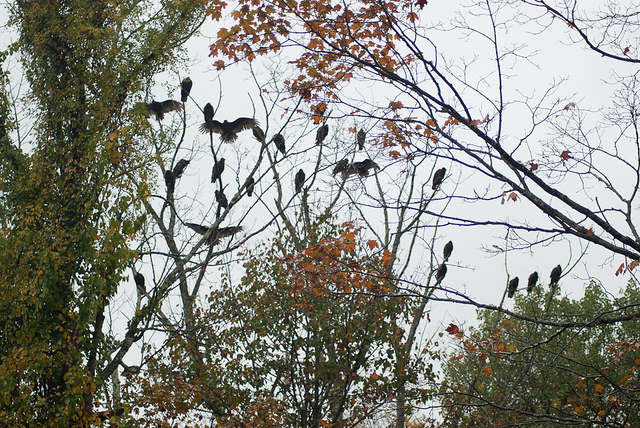

In [7]:
train_captions = []
img_name_vector = []
for image_path in train_image_paths:
  caption_list = image_captions_path[image_path]
  train_captions.extend(caption_list)
  img_name_vector.extend([image_path] * len(caption_list))
print(train_captions[1])
Image.open(img_name_vector[1])

In [8]:
train_captions

['<start> A flock of birds are resting in the tree branches.  <end>',
 '<start> A flock of birds sitting in the trees under a cloudy sky. <end>',
 '<start> A number of birds are perched in the high parts of autumn trees. <end>',
 '<start> Small flock of birds sitting on tree branches. <end>',
 '<start> A bunch of birds perched upon branches of a tree.  <end>',
 '<start> The train is riding past a couple of mountains. <end>',
 '<start> A freight train traveling through a green mountainous area <end>',
 '<start> A black and blue train passing by grassy area next to mountains. <end>',
 '<start> A train riding on train tracks near mountains and grass.  <end>',
 '<start> A large long train on a steel track. <end>',
 '<start> A very cute giraffe sticking out its tongue. <end>',
 '<start> THERE IS A GIRAFFE WITH A LONG TOUNGE EATING A PLANT <end>',
 '<start> a giraffe tongue reaching out to eat some leaves off a tree  <end>',
 '<start> A giraffe eating a bunch of green leaves. <end>',
 '<star